In [3]:
# setting uop working directory
import os
os.getcwd() 
import sys
sys.path.append('../ThinkStats2-master/code')

In [12]:
import pandas as pd 
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
  
# creating a data frame 

gss = pd.read_csv("GSS7218_R3.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
                                          
                                          


In [50]:
gss_clean = gss[["YEAR","SEX","AGE","INCOME","COHORT","RACE","EDUC","REALINC","WTSSALL"]].copy()


In [51]:
# Original dataset file is hige , can not upload original dataset file. Creating a subset si I can upload it 
gss_clean.to_csv("Clean_data.csv")

In [19]:
# Compute the PMF for year
pmf_year=thinkstats2.Pmf(gss_clean.YEAR)


In [21]:
age = gss_clean['AGE']

In [65]:
pmf_age = thinkstats2.Pmf(gss_clean.AGE.astype(float))

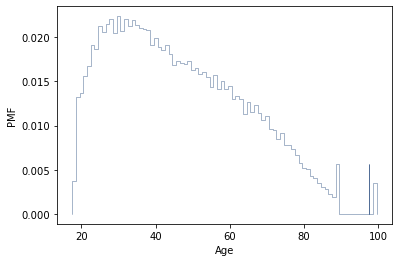

In [66]:

# Plot the PMF
 
# Label the axes
thinkplot.Pmf(pmf_age,linewidth=0.5)
thinkplot.Config(xlabel='Age', ylabel='PMF')





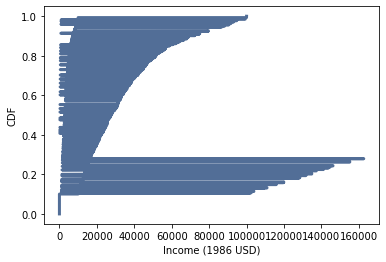

In [67]:
# Select realinc


income = gss_clean.REALINC
 
# Make the CDF
cdf_income = thinkstats2.Cdf(income)
thinkplot.Cdf(cdf_income)
thinkplot.Config(xlabel='Income (1986 USD)', ylabel='CDF')




In [68]:
thinkstats2.Cdf(gss_clean.EDUC)

Cdf(['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '3'
 '4' '5' '6' '7' '8' '9' '98' '99'], [0.00254575 0.0032709  0.04770574 0.10545561 0.40883143 0.49152961
 0.60199957 0.64689728 0.77580461 0.80615299 0.84293517 0.85712963
 0.8594748  0.8816768  0.88564199 0.89056377 0.89676613 0.90954115
 0.92310303 0.96513099 0.99726911 0.99839541 1.        ])

In [69]:
educ = gss_clean['EDUC'].astype(int)
educ.describe()


count    64814.000000
mean        13.103774
std          5.483884
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         99.000000
Name: EDUC, dtype: float64

In [70]:
# Bachelor's degree
bach = (educ >= 16)
 
# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5267689079519857


In [71]:
bach,assc

(0         True
 1        False
 2        False
 3         True
 4        False
          ...  
 64809    False
 64810    False
 64811    False
 64812     True
 64813    False
 Name: EDUC, Length: 64814, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 64809    False
 64810    False
 64811    False
 64812    False
 64813    False
 Name: EDUC, Length: 64814, dtype: bool)

In [72]:
gss_clean.YEAR.describe()

count     64814
unique       32
top        2006
freq       4510
Name: YEAR, dtype: object

In [73]:
pre95=gss_clean.YEAR.astype(int) < 1995

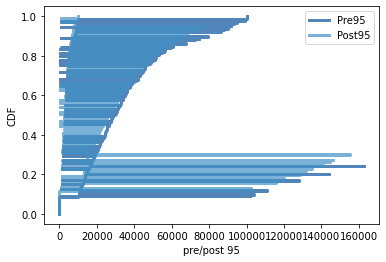

In [74]:
income[pre95]
income[~pre95]

income_pre95=thinkstats2.Cdf(income[pre95],label='Pre95')
income_post95=thinkstats2.Cdf(income[~pre95],label='Post95')

thinkplot.PrePlot(2)

thinkplot.Cdfs([income_pre95, income_post95])
thinkplot.Config(xlabel='pre/post 95', ylabel='CDF')



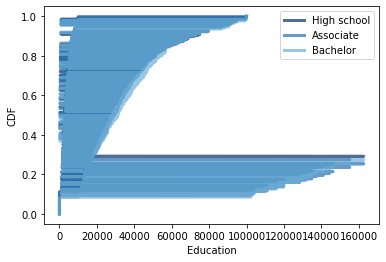

In [75]:

# Label the axes

income_high=thinkstats2.Cdf(income[high],label='High school')
income_assc=thinkstats2.Cdf(income[assc],label='Associate')
income_batch=thinkstats2.Cdf(income[bach],label='Bachelor')

thinkplot.PrePlot(3)

thinkplot.Cdfs([income_high, income_assc,income_batch])
thinkplot.Config(xlabel='Education', ylabel='CDF')

In [80]:

income_ft=income.astype(float)
income_ft.describe()

count     64814.000000
mean      28548.912992
std       29584.666171
min           0.000000
25%        8595.000000
50%       21060.000000
75%       37455.000000
max      162607.000000
Name: REALINC, dtype: float64

In [81]:
# Extract realinc and compute its log

log_income = np.log10(income_ft+.000001)
 
# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)
# 4.371148677934171 0.42900437330100427
 
# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

3.2804697678882446 3.1326461920991147


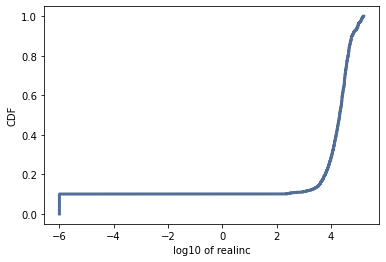

In [82]:

cdf = thinkstats2.Cdf(log_income)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='log10 of realinc', ylabel='CDF')